In [6]:
from tensorflow.keras.datasets import reuters
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical


In [7]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [8]:
def vectorize_sequences(sequences, dimension = 10000) :
    results = np.zeros((len(sequences), dimension)) # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬 생성
    for i, sequence in enumerate(sequences) :
        for j in sequence:
            results[i, j] = 1. # i리뷰에 존재하는 단어의 index j의 값을 1로 변경한다
    return results

In [9]:
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)
# 훈련 데이터를 각각의 리뷰마다 같은 크기를 가지는 벡터로 변경한다
# 멀티 핫 인코딩
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [10]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
# 레이블을 벡터 데이터로 변환
# 원 핫 인코딩

In [43]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(46, activation="softmax")
])

# 마지막 출력 층이 46
# 46개의 레이블을 가짐
# 각 레이블에 속할 확률을 구하기 위해 softmax 적용

In [44]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [29]:
x_val = x_train[:1000] # 훈련 데이터에서 index 0 ~ 999인 데이터만 검증 데이터로 분리한다
partial_x_train = x_train[1000:] # 훈련 데이터에서 index 1000 부터는 훈련에 사용한다
y_val = y_train[:1000] # 훈련 레이블에서 index 0 ~ 999인 데이터만 검증 레이블로 분리한다
partial_y_train = y_train[1000:]  # 훈련 레이블에서 ndex 1000 부터는 훈련에 사용한다

In [45]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 52ms/step - loss: 3.3400 - accuracy: 0.2001 - val_loss: 2.7163 - val_accuracy: 0.5710
Epoch 2/20
16/16 [==============================] - 0s 30ms/step - loss: 2.2383 - accuracy: 0.6295 - val_loss: 1.8635 - val_accuracy: 0.6370
Epoch 3/20
16/16 [==============================] - 1s 33ms/step - loss: 1.6016 - accuracy: 0.6740 - val_loss: 1.5067 - val_accuracy: 0.6760
Epoch 4/20
16/16 [==============================] - 1s 37ms/step - loss: 1.2966 - accuracy: 0.7283 - val_loss: 1.3344 - val_accuracy: 0.7020
Epoch 5/20
16/16 [==============================] - 1s 31ms/step - loss: 1.1060 - accuracy: 0.7607 - val_loss: 1.2155 - val_accuracy: 0.7260
Epoch 6/20
16/16 [==============================] - 0s 30ms/step - loss: 0.9560 - accuracy: 0.7915 - val_loss: 1.1356 - val_accuracy: 0.7500
Epoch 7/20
16/16 [==============================] - 1s 39ms/step - loss: 0.8293 - accuracy: 0.8188 - val_loss: 1.0751 - val_accuracy: 0.7680
Epoch 8/20
16

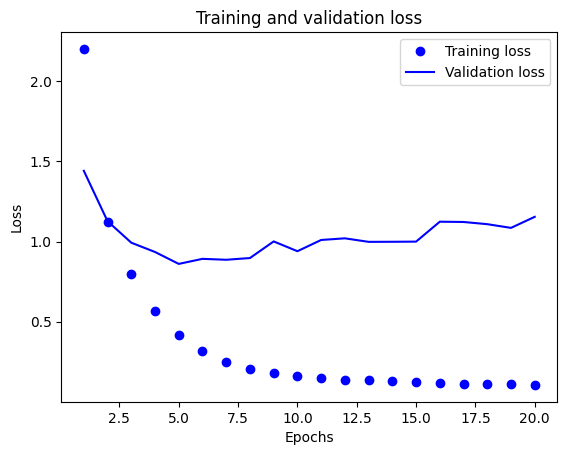

In [36]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# history에 저장된 데이터를 matplotlib을 이용하여 시각화한다.
# 그래프의 y축은 loss

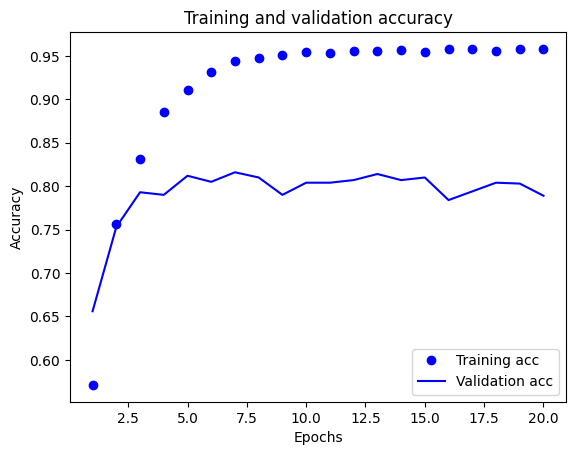

In [37]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# history에 저장된 데이터를 matplotlib을 이용하여 시각화한다.
# 그래프의 y축은 accuracy

In [46]:
# history에 저장된 기록으로 적절한 epoch를 결정한다.
# epoch 4 이후로 손실이 증가하므로 epoch는 4까지만 수행한다
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/5
18/18 [==============================] - 2s 37ms/step - loss: 3.0660 - accuracy: 0.5235
Epoch 2/5
18/18 [==============================] - 1s 33ms/step - loss: 1.8642 - accuracy: 0.6649
Epoch 3/5
18/18 [==============================] - 1s 34ms/step - loss: 1.3667 - accuracy: 0.7140
Epoch 4/5
18/18 [==============================] - 1s 32ms/step - loss: 1.1109 - accuracy: 0.7524
Epoch 5/5
71/71 [==============================] - 1s 4ms/step - loss: 1.1716 - accuracy: 0.7373


In [51]:
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 74ms/step - loss: 2.2143 - accuracy: 0.5491 - val_loss: 1.4341 - val_accuracy: 0.6880
Epoch 2/20
16/16 [==============================] - 1s 63ms/step - loss: 1.1350 - accuracy: 0.7547 - val_loss: 1.1541 - val_accuracy: 0.7660
Epoch 3/20
16/16 [==============================] - 1s 54ms/step - loss: 0.7819 - accuracy: 0.8373 - val_loss: 0.9969 - val_accuracy: 0.7880
Epoch 4/20
16/16 [==============================] - 1s 58ms/step - loss: 0.5634 - accuracy: 0.8846 - val_loss: 0.9326 - val_accuracy: 0.8130
Epoch 5/20
16/16 [==============================] - 1s 59ms/step - loss: 0.4174 - accuracy: 0.9132 - val_loss: 0.8604 - val_accuracy: 0.8170
Epoch 6/20
16/16 [==============================] - 1s 71ms/step - loss: 0.3139 - accuracy: 0.9323 - val_loss: 0.8888 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 1s 64ms/step - loss: 0.2527 - accuracy: 0.9419 - val_loss: 0.9363 - val_accuracy: 0.8000
Epoch 8/20
16

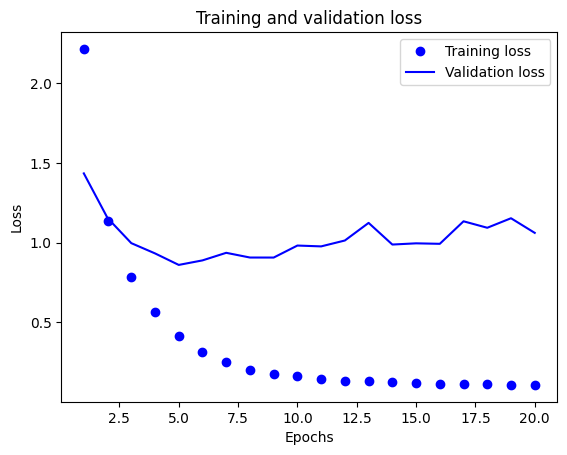

In [52]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# history에 저장된 데이터를 matplotlib을 이용하여 시각화한다.
# 그래프의 y축은 loss

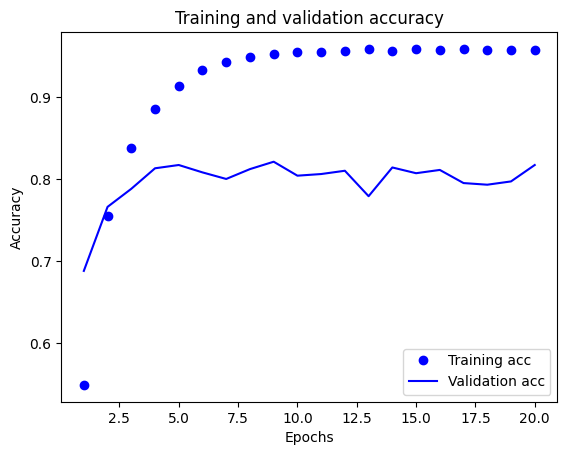

In [53]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# history에 저장된 데이터를 matplotlib을 이용하여 시각화한다.
# 그래프의 y축은 accuracy

In [54]:
# history에 저장된 기록으로 적절한 epoch를 결정한다.
# epoch 4 이후로 손실이 증가하므로 epoch는 4까지만 수행한다
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/6
18/18 [==============================] - 2s 46ms/step - loss: 2.0697 - accuracy: 0.5911
Epoch 2/6
18/18 [==============================] - 1s 59ms/step - loss: 1.0329 - accuracy: 0.7848
Epoch 3/6
18/18 [==============================] - 1s 57ms/step - loss: 0.7164 - accuracy: 0.8486
Epoch 4/6
18/18 [==============================] - 1s 58ms/step - loss: 0.5062 - accuracy: 0.8946
Epoch 5/6
18/18 [==============================] - 1s 66ms/step - loss: 0.3734 - accuracy: 0.9200
Epoch 6/6
71/71 [==============================] - 1s 6ms/step - loss: 0.9261 - accuracy: 0.7974
